In [1]:

from model.sfcn import SFCN
import numpy as np
import pandas as pd
from volumedatagenerator import VolumeDataGeneratorRegression
import matplotlib.pyplot as plt

import time
import sys

2022-01-30 16:46:27.070340: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
name = 'sfcn_nogloavg'
index= 0

batch_size = 8
gpu_num = 8
cpu_workers = 8
epochs_num = 64

idps_labels = pd.read_csv('csv/idps_desc.csv')['id'].to_list()
idps_labels = [str(l) for l in idps_labels]

train_df = pd.read_csv('csv/split_train.csv', index_col='id').dropna()
valid_df = pd.read_csv('csv/split_valid.csv', index_col='id').dropna()
test_df = pd.read_csv('csv/split_test.csv', index_col='id').dropna()

input_dim = [182, 218, 182]
num_output = len(idps_labels)

train_gen = VolumeDataGeneratorRegression(
sample_df=train_df, 
batch_size=batch_size, 
#num_reg_classes=num_output, 
dim=input_dim,
output_preprocessing='quantile', 
idps_labels=idps_labels)

scaler_instance = train_gen.get_scaler_instance()

valid_gen = VolumeDataGeneratorRegression(
sample_df=valid_df, 
batch_size=batch_size, 
#num_reg_classes=num_output, 
dim=input_dim,
output_scaler=scaler_instance,
shuffle=False, 
idps_labels=idps_labels)


TypeError: __init__() missing 1 required positional argument: 'sample_stats_df'

In [29]:
model = SFCN(
        input_dim=[182, 218, 182, 1], 
        output_dim=num_output,
        conv_num_filters=[32, 64, 64, 128, 256, 256], 
        conv_kernel_sizes=[3, 3, 3, 3, 1, 1], 
        conv_strides=[3, 3, 3, 3, 1, 1],
        conv_padding=['same', 'same', 'same', 'same', 'same', 'valid'],
        pooling_size=[2, 2, 2, 2, 2],
        pooling_type=['no_pool', 'no_pool', 'no_pool', 'no_pool', 'no_pool'],
        batch_norm=True,
        dropout=False,
        softmax=False,
        gpu_num=gpu_num,
        use_float16=True,  
        name=name+'_'+str(index)
        )


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3', '/job:localhost/replica:0/task:0/device:GPU:4', '/job:localhost/replica:0/task:0/device:GPU:5', '/job:localhost/replica:0/task:0/device:GPU:6', '/job:localhost/replica:0/task:0/device:GPU:7')
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 182, 218, 182, 1) 0         
_________________________________________________________________
conv_0 (Conv3D)              (None, 61, 73, 61, 32)    896       
_________________________________________________________________
batchnorm_0 (BatchNormalizat (None, 61, 73, 61, 32)    128       
_________________________________________________________________
activation_0 (Acti

In [ ]:
model.compile()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import QuantileTransformer

In [3]:
test = pd.read_csv('csv/split_test.csv', index_col='eid').drop('path', axis=1)
test.head()

,25011-2.0,25012-2.0,25013-2.0,25014-2.0,25015-2.0,25016-2.0,25017-2.0,25018-2.0,25019-2.0,25020-2.0,...,27763-2.0,27764-2.0,27765-2.0,27766-2.0,27767-2.0,27768-2.0,27769-2.0,27770-2.0,27771-2.0,27772-2.0
eid,,,,,,,,,,,,,,,,,,,,,
1351280,9075.0,9142.0,4196.0,5187.0,5799.0,6354.0,1783.0,2443.0,4176.0,4637.0,...,4254.0,1488.0,3676.0,2464.0,2923.0,628.0,3040.0,2494.0,11644.0,453.0
1150800,7336.0,7086.0,3449.0,3516.0,4944.0,5066.0,1775.0,1755.0,3882.0,4221.0,...,4403.0,1379.0,3875.0,2616.0,2636.0,375.0,1932.0,1930.0,10137.0,575.0
1020056,8175.0,7950.0,3853.0,4021.0,4959.0,4879.0,1582.0,1522.0,4311.0,4113.0,...,3862.0,1102.0,3855.0,2878.0,2252.0,472.0,2223.0,2355.0,11512.0,528.0
1004656,7757.0,7530.0,3609.0,3971.0,4696.0,4703.0,1638.0,1879.0,4079.0,4013.0,...,3783.0,708.0,3741.0,2257.0,1830.0,321.0,1587.0,2057.0,9632.0,321.0
1248454,6875.0,6864.0,3438.0,3752.0,4000.0,4448.0,1944.0,1704.0,3463.0,3744.0,...,3668.0,1182.0,3280.0,2280.0,2557.0,366.0,1656.0,1798.0,8715.0,506.0


In [6]:
test.columns.to_list()

['25011-2.0',
 '25012-2.0',
 '25013-2.0',
 '25014-2.0',
 '25015-2.0',
 '25016-2.0',
 '25017-2.0',
 '25018-2.0',
 '25019-2.0',
 '25020-2.0',
 '25021-2.0',
 '25022-2.0',
 '25023-2.0',
 '25024-2.0',
 '25782-2.0',
 '25783-2.0',
 '25784-2.0',
 '25785-2.0',
 '25786-2.0',
 '25787-2.0',
 '25788-2.0',
 '25789-2.0',
 '25790-2.0',
 '25791-2.0',
 '25792-2.0',
 '25793-2.0',
 '25794-2.0',
 '25795-2.0',
 '25796-2.0',
 '25797-2.0',
 '25798-2.0',
 '25799-2.0',
 '25800-2.0',
 '25801-2.0',
 '25802-2.0',
 '25803-2.0',
 '25804-2.0',
 '25805-2.0',
 '25806-2.0',
 '25807-2.0',
 '25808-2.0',
 '25809-2.0',
 '25810-2.0',
 '25811-2.0',
 '25812-2.0',
 '25813-2.0',
 '25814-2.0',
 '25815-2.0',
 '25816-2.0',
 '25817-2.0',
 '25818-2.0',
 '25819-2.0',
 '25820-2.0',
 '25821-2.0',
 '25822-2.0',
 '25823-2.0',
 '25824-2.0',
 '25825-2.0',
 '25826-2.0',
 '25827-2.0',
 '25828-2.0',
 '25829-2.0',
 '25830-2.0',
 '25831-2.0',
 '25832-2.0',
 '25833-2.0',
 '25834-2.0',
 '25835-2.0',
 '25836-2.0',
 '25837-2.0',
 '25838-2.0',
 '2583

In [8]:
col_list = pd.read_csv('fields/subcortical_volumes.csv')['field id'].to_list()


for i,col in enumerate(col_list):
    col_list[i] +=  (str(col)+'-2.0')

In [9]:
test[col_list]

KeyError: "None of [Int64Index([25023, 25024, 25021, 25022, 25013, 25014, 25019, 25020, 25017,\n            25018, 25015, 25016, 25011, 25012],\n           dtype='int64')] are in the [columns]"

In [6]:
scaler = QuantileTransformer(n_quantiles=1000)
res = scaler.fit_transform(test)


In [7]:
res

array([[0.23123123, 0.17017017, 0.72172172, ..., 0.6971972 , 0.59863946,
        0.57357357],
       [0.96146132, 0.95321336, 0.22200957, ..., 0.97376093, 0.98539826,
        0.47097097],
       [0.36372372, 0.29748095, 0.48448448, ..., 0.57612816, 0.15951837,
        0.48348348],
       ...,
       [0.37607656, 0.23397088, 0.38096198, ..., 0.09811256, 0.00498713,
        0.56156156],
       [0.24023457, 0.59309309, 0.00848615, ...,        nan,        nan,
               nan],
       [0.89754501, 0.86013142, 0.88437644, ..., 0.71817298, 0.70343725,
        0.02026077]])

In [4]:
test_list = test['path'].to_list()

In [14]:
import nibabel as nib
import time
import matplotlib.pyplot as plt
import numpy as np

In [15]:
tic = time.perf_counter()

img = nib.load('/ritter/share/data/UKBB_2020/BIDS/sub-1136676/ses-2/anat/sub-1136676_ses-2_T1_brain_to_MNI.nii.gz')
fdata = img.get_fdata()   

toc = time.perf_counter()

print(f"time: {toc - tic:0.4f} seconds")

time: 0.2759 seconds


In [16]:
10000*fdata.nbytes/1e9

577.68256

In [17]:
img.get_data_dtype() == np.dtype('float64')

False

In [19]:
np.max(fdata)

2595.0

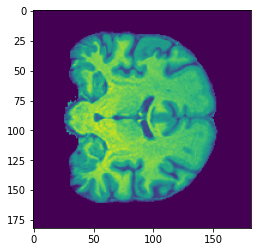

In [9]:
plt.imshow(fdata[:,109,:])
plt.show()

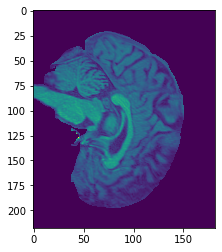

In [7]:
plt.imshow(fdata[91,:,:])
plt.show()

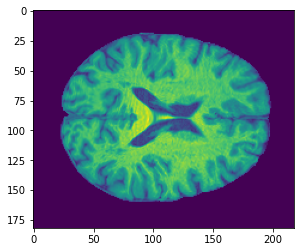

In [8]:
plt.imshow(fdata[:,:,91])
plt.show()

In [9]:
dim = fdata.shape

In [10]:
X = np.zeros(shape=(10, *dim, 1))

In [11]:
X.shape

(10, 182, 218, 182, 1)

In [18]:
X[0] = fdata.reshape((*dim,1))

In [25]:
indices = np.arange(0,4)

In [26]:
indices

array([0, 1, 2, 3])

In [27]:
sample_list = [test.iloc[i]['path'] for i in indices]

In [28]:
sample_list

['/ritter/share/data/UKBB_2020/BIDS/sub-1075399/ses-2/anat/sub-1075399_ses-2_T1_brain_to_MNI.nii.gz',
 '/ritter/share/data/UKBB_2020/BIDS/sub-1208910/ses-2/anat/sub-1208910_ses-2_T1_brain_to_MNI.nii.gz',
 '/ritter/share/data/UKBB_2020/BIDS/sub-1351069/ses-2/anat/sub-1351069_ses-2_T1_brain_to_MNI.nii.gz',
 '/ritter/share/data/UKBB_2020/BIDS/sub-1099683/ses-2/anat/sub-1099683_ses-2_T1_brain_to_MNI.nii.gz']

In [2]:
from tensorflow import keras
import tensorflow as tf

In [3]:
keras_placeholder = tf.keras.backend.placeholder(shape=(2, 4, 5))

In [4]:
keras_placeholder

<KerasTensor: shape=(2, 4, 5) dtype=float32 (created by layer 'input_1')>

In [6]:
keras_placeholder.shape.as_list()

[2, 4, 5]

In [1]:
import pandas as pd

In [9]:
def combine_result(name):
   template = pd.read_csv('csv/idps_desc.csv', index_col='id') 

   mse = pd.read_csv('results/'+name+'_test_multi_mse.csv').iloc[[-1]].T
   r2 = pd.read_csv('results/'+name+'_test_multi_r2.csv').iloc[[-1]].T

   mse.columns =['mse']
   mse.index.name = 'id'
   mse.index = mse.index.astype(int)

   r2.columns=['r2']
   r2.index.name = 'id'
   r2.index = r2.index.astype(int)

   joined = r2.join(mse, on='id',how='left')
   template = template.join(joined, on='id', how='left')
   
   template.to_csv('results/'+name+'.csv', sep=';',doublequote=False, escapechar='\t')

In [12]:
combine_result('sfcn_vanilla')

In [50]:
mse = pd.read_csv('results/sfcn_pyramid_avg_test_multi_mse.csv').T
r2 = pd.read_csv('results/sfcn_pyramid_avg_test_multi_r2.csv').T

In [51]:
mse.columns =['mse']
mse.index.name = 'id'
mse.index = mse.index.astype(int)

In [52]:
r2.columns=['r2']
r2.index.name = 'id'
r2.index = r2.index.astype(int)

In [53]:
joined = r2.join(mse, on='id',how='left')

In [55]:
template.join(joined, on='id', how='left' )

,desc,group,mean,r2,mse
id,,,,,
26822,Area of TotalSurface (right hemisphere),Freesurfer desikan white,85238.820221,0.804206,0.016087
26721,Area of TotalSurface (left hemisphere),Freesurfer desikan white,84490.305485,0.785780,0.017740
26956,Area of TotalSurface (right hemisphere),Freesurfer desikan pial,100292.984111,0.782479,0.018063
26923,Area of TotalSurface (left hemisphere),Freesurfer desikan pial,99900.055369,0.737366,0.021840
26522,Volume of VentricleChoroid (whole brain),Freesurfer ASEG,27292.573424,0.331350,0.055635
...,...,...,...,...,...
27024,Grey-white contrast in unknown (right hemisphere),Freesurfer desikan gw,0.068181,-0.020699,0.084733
26576,Mean intensity of Pallidum (right hemisphere),Freesurfer ASEG,98.944701,0.043851,0.081391
26508,Mean intensity of Optic-Chiasm (whole brain),Freesurfer ASEG,75.191942,-0.029753,0.084224


In [63]:
template.to_csv('results/avgpool_sfcn.csv', sep=';',doublequote=False, escapechar='\t')

In [ ]:
myCsv = template.astype(str).apply(lambda x: '   '.join(x), axis=1)
myCsv.rename('   '.join(template.columns)).to_csv('results/avgpool_sfcn.csv', header=True, index=False)

In [1]:
from model.sfcn import SFCN
import numpy as np
import pandas as pd
from volumedatagenerator import VolumeDataGeneratorRegression
import matplotlib.pyplot as plt

import sys
import time

2022-02-09 16:10:40.233762: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
batch_size = 8
gpu_list =  [4,5,6,7]
cpu_workers = 8
epochs_num = 64

idps_labels = pd.read_csv('csv/idps_desc.csv')['id'].to_list()
idps_labels = [str(l) for l in idps_labels]

input_dim = [160, 192, 160]
num_output = len(idps_labels)

In [5]:
model = SFCN(
        input_dim=[160, 192, 160, 1], 
        output_dim=num_output,
        conv_num_filters=[32, 64, 64, 128, 256, 256, 512], 
        conv_kernel_sizes=[2, 2, 2, 2, 2, 2, 1], 
        conv_strides=[1, 1, 1, 1, 1, 1, 1],
        conv_padding=['same', 'same', 'same', 'same',  'same',  'same', 'valid'],
        pooling_size=[2, 2, 2, 2, 2, 2],
        pooling_type=['max_pool', 'max_pool', 'max_pool', 'max_pool', 'max_pool', 'max_pool'],
        normalization='batch',
        dropout=False,
        #dropout_rate=0.5,
        softmax=False,
        global_pooling='max_pool',
        use_float16=False,
        reduce_lr_on_plateau=0.5,
        batch_size=batch_size, 
        early_stopping=8,
        gpu_list = gpu_list,
        name='test')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


2022-02-09 16:11:05.365574: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-09 16:11:05.367095: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-09 16:11:05.626502: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0c:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-02-09 16:11:05.629326: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:0d:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-02-09 16:11:05.632189: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 2 with properties: 
pciBusID: 0000:0e:0

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

In [14]:
model = SFCN(
        input_dim=[160, 192, 160, 1], 
        output_dim=num_output,
        conv_num_filters=[32, 64, 64, 256, 512], 
        conv_kernel_sizes=[3, 3, 3, 3, 1], 
        conv_strides=[1, 1, 1, 1, 1],
        conv_padding=['same', 'same', 'same', 'same', 'valid'],
        pooling_size=[2, 2, 2, 2, 2],
        pooling_type=['max_pool', 'max_pool', 'max_pool', 'max_pool'],
        normalization='batch',
        dropout=False,
        softmax=False,
        global_pooling='max_pool',
        use_float16=False,
        reduce_lr_on_plateau=0.5,
        batch_size=batch_size, 
        early_stopping=8,
        gpu_list = gpu_list)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
Model: "SFCN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 160, 192, 160, 1) 0         
_________________________________________________________________
conv_0 (Conv3D)              (None, 160, 192, 160, 32) 896       
_________________________________________________________________
batchnorm_0 (BatchNormalizat (None, 160, 192, 160, 32) 128       
_________________________________________________________________
maxpool_0 (MaxPooling3D)     (None, 80, 96, 80, 32)    0         
_________________________________________________________________
activation_0 (Activation)    (None, 80, 96, 80, 32)    0         
_______________

In [1]:
from model.res_sfcn import ResSFCN
import numpy as np
import pandas as pd
from volumedatagenerator import VolumeDataGeneratorRegression
import matplotlib.pyplot as plt

import sys
import time

2022-02-04 16:35:33.387483: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
batch_size = 8
gpu_list =  [4,5,6,7]
cpu_workers = 8
epochs_num = 64

idps_labels = pd.read_csv('csv/idps_desc.csv')['id'].to_list()
idps_labels = [str(l) for l in idps_labels]

input_dim = [160, 192, 160]
num_output = len(idps_labels)

In [3]:
model = ResSFCN(
        input_dim=[160, 192, 160, 1], 
        output_dim=num_output,
        conv_num_filters=[32, 64, 64, 128, 256, 256], 
        conv_kernel_sizes=[2, 2, 2, 2, 2, 1], 
        conv_strides=[2, 2, 2, 2, 2, 1],
        conv_padding=['same', 'same', 'same',  'same',  'same', 'valid'],
        normalization='batch',
        dropout=False,
        #dropout_rate=0.5,
        global_pooling='max_pool',
        softmax=False,
        use_float16=False,
        reduce_lr_on_plateau=0.5,
        batch_size=batch_size, 
        early_stopping=8,
        gpu_list = gpu_list,
        name='test_1')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


2022-02-04 16:35:39.106397: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-04 16:35:39.108083: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-04 16:35:39.323688: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0c:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-02-04 16:35:39.326436: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:0d:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-02-04 16:35:39.329245: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 2 with properties: 
pciBusID: 0000:0e:0

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu